# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns


In [2]:
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10794,7,2750000.0,44.00,2017-04-27T00:00:00,2,2.50,5.0,31.00,3,NaN,...,5.50,0.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,109.0
21072,11,3200000.0,31.00,2017-02-13T00:00:00,1,2.75,22.0,15.00,6,False,...,9.00,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,67.0
5397,3,25000000.0,127.00,2019-01-24T00:00:00,5,3.20,6.0,90.00,6,NaN,...,NaN,NaN,Санкт-Петербург,25420.0,4267.0,1.0,432.0,3.0,357.0,8.0
32,7,4990000.0,60.00,2016-05-22T00:00:00,3,NaN,5.0,39.00,4,NaN,...,6.00,0.0,Санкт-Петербург,11349.0,12889.0,0.0,NaN,1.0,426.0,224.0
9074,8,10400000.0,91.50,2018-02-01T00:00:00,3,2.70,23.0,56.12,17,NaN,...,14.04,NaN,Санкт-Петербург,35935.0,9508.0,0.0,NaN,1.0,136.0,78.0
12104,10,3182400.0,35.36,2018-10-01T00:00:00,1,NaN,NaN,10.00,7,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25866.0,1.0,251.0,1.0,350.0,145.0
21818,10,6090700.0,79.00,2019-01-29T00:00:00,3,NaN,19.0,NaN,14,NaN,...,13.30,NaN,Санкт-Петербург,43157.0,22488.0,0.0,NaN,1.0,933.0,31.0
6227,12,4600000.0,65.00,2018-11-01T00:00:00,2,2.75,24.0,33.00,10,NaN,...,10.00,1.0,посёлок Шушары,13908.0,19694.0,0.0,NaN,1.0,645.0,7.0
21577,10,5350000.0,39.40,2017-09-13T00:00:00,1,NaN,12.0,15.00,4,NaN,...,10.30,2.0,Санкт-Петербург,39946.0,10720.0,1.0,2102.0,3.0,303.0,8.0
1282,14,3390000.0,39.20,2018-07-08T00:00:00,1,NaN,9.0,15.40,1,NaN,...,11.60,NaN,Красное Село,25209.0,28633.0,0.0,NaN,0.0,NaN,20.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


(None,
 None,
 None,
 total_images                0
 last_price                  0
 total_area                  0
 first_day_exposition        0
 rooms                       0
 ceiling_height           9195
 floors_total               86
 living_area              1903
 floor                       0
 is_apartment            20924
 studio                      0
 open_plan                   0
 kitchen_area             2278
 balcony                 11519
 locality_name              49
 airports_nearest         5542
 citycenters_nearest      5519
 parks_around3000         5518
 parks_nearest           15620
 ponds_around3000         5518
 ponds_nearest           14589
 days_exposition          3181
 dtype: int64)

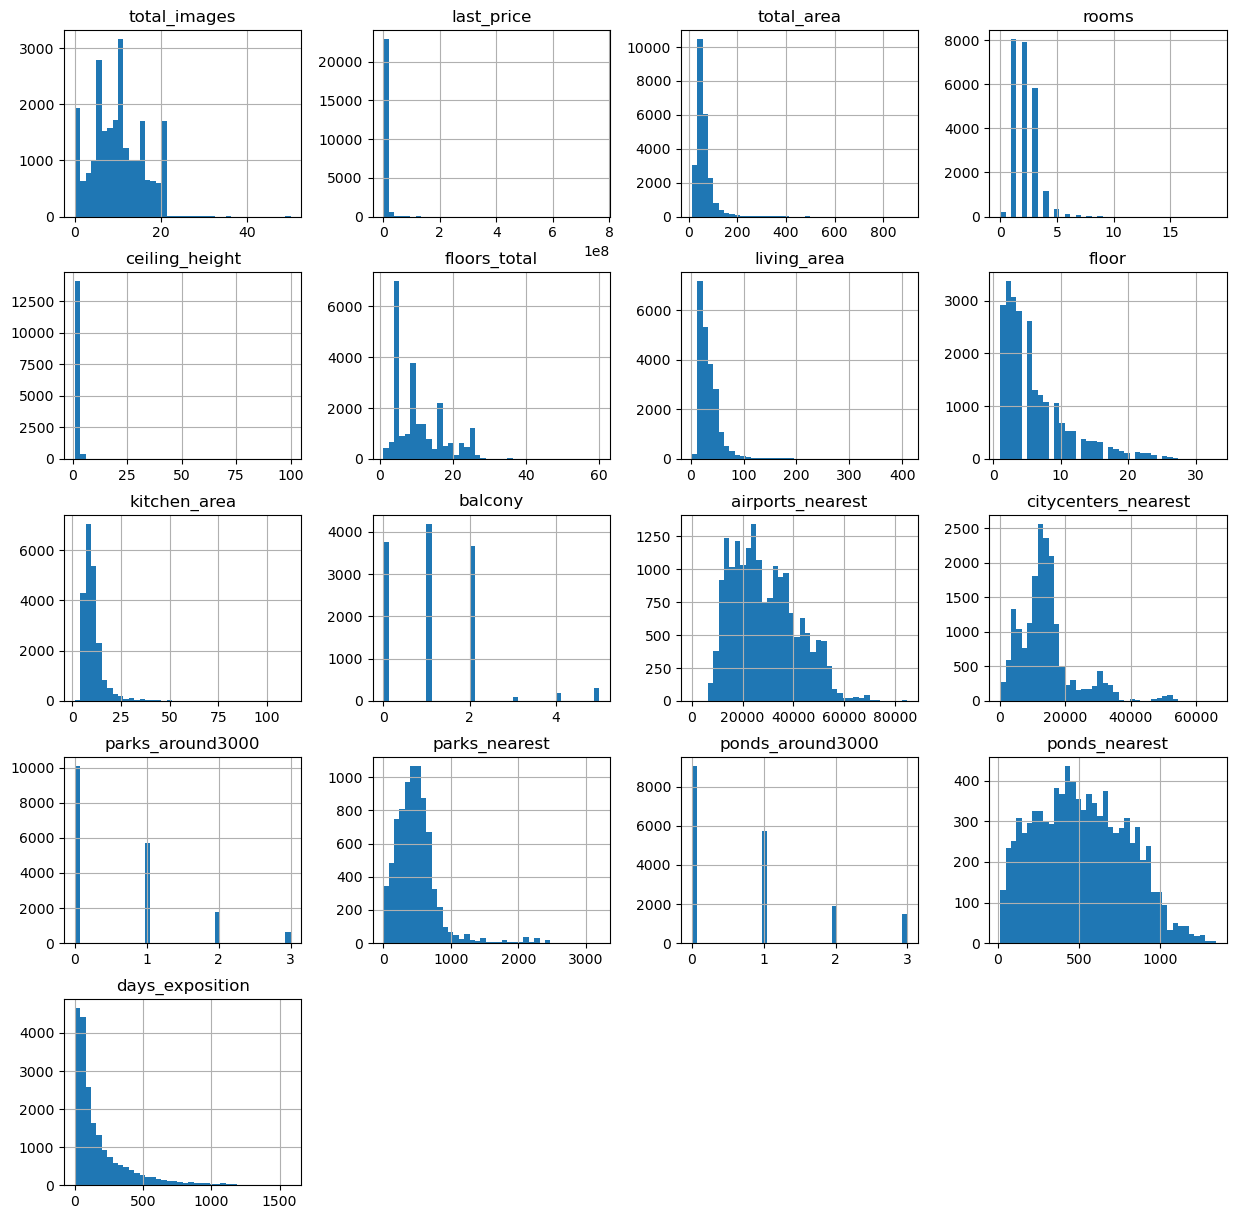

In [3]:
# Для получение первичной информации о датасете использую собственную функцию для вывода 
#основной информации и первичной предобработки.
def total_info_data(data):
    data.columns = data.columns.str.lower() # Приводим колонки к нижнему регистру
    data = data.drop_duplicates().reset_index(drop=True) # Удаляем явные дубликаты
    random_str = display(data.sample(frac=0.25).head(30))  #Выводим 15 случайных строк датафрейма
    info = data.info()
    nan = data.isna().sum() # Получаем ифномарцию о пропусках
    describe = display(data.describe()) # Получаем полное описание датафрейма
    data.hist(bins=40,figsize=(15,15)) # Строим гистограмы для каждного столбца для первичного выявления проблем в данных
    
    return random_str, info, describe, nan

        
total_info_data(data)

**Первые наблюдения**

**Полнота и качество заполнения значений**
* Всего в датасете 23699 строк, при этом такие столбцы как: total_images, last_price, total_area,
first_day_exposition, rooms, floor, studio, open_plan заполнены полностью и не имеют пропусков.


* Столбцы floors_total, locality_name заполнены на 98-99%, что позволит удалить пропуски по причине того, что это не скажется на информативности датасета.


* Много пропусков в столбцах, отвечающих за расположение рядом с квартирой таких объектов как аэропорт, парк, водоем.

В столбцах про парк и пруды существует взаимосвязь. При значении в столбце parks_around3000 или ponds_around3000 равном 0, столбцы parks_nearest и ponds_nearest получают значение Nan. Можно сделать вывод, что с этими столбцами все в порядке. Pandas при наличии значения NaN присваивает тип float64 столбцам и при необходимости есть возможность производить расчеты.

Видны проблемы с столбцами airports_nearest и citycenters_nearest, они имеют по 5500 пропусков. Нужно проверить, связаны ли пропуски с населенным пунктом. Вполне вероятно, что расстояния до аэропорта и центра города не указывается, если квартира находится в деревне и пригороде. Так как эти данные заполняются автоматически на основе картографических данных, нужно обратиться к специалисту и узнать причину проблем с заполнением. Связано это с тем, что данные не указываются, если город не СПБ, или это технический сбой при сборе данных?


* Столбец kitchen_area и living_area имеет 2278 и 1903 пропусков соответственно. Вероятно, потребуется замена на среднее или медианное значение площади в зависимости от общей площади.


* Столбец balcony заполнен на половину, с большой вероятностью пропуски обозначают отсутствие балкона, и подлежат замене на 0.

**Типы данных столбцов:**

* Столбец is_apartment имеет тип object, но содержит в себе булевы значения в количестве 2775, и остальное это NaN, отметим на будущее необходимость привести в порядок тип столбца и заменить NaN на False, так как вероятнее всего отсутствие значения указывает на то, что это не апартаменты, а значит False.
* Столбец first_day_exposition имеет тип object, но содержит в себе временной показатель.
* Остальные столбцы имеют корректный тип, отметим, что значения столбцов int64 уместны и не нуждаются в переводе в float.

**Аномальные значения**
* Столбцы rooms, ceilinh_height, living_area, kitchen_area имеют минимальные значения 0 и 1, либо подозрительно низкие значения.
* total_area, rooms, ceiling_height, living_area, kitchen_area имеют подозрительно высокие значения, которые требуют дополнительной проверки.


### Предобработка данных

Перед началом обработки датафрейма, сохраним его в изначальном виде, чтобы была возможность вернуться к исходным данным.

In [4]:
#копируем датафрейм
data_row = data.copy(deep=True)

Начинаем предобработку каждого столбца.

In [5]:
# Удалим строки с пропущеным значением, количество которых меньше 1%
data = data.dropna(subset=['floors_total','locality_name']).reset_index()


* Проверим столбец **"locality_name"** на неявные дубликаты.



In [6]:
data['locality_name'].value_counts()
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Можно заметить, что некоторые значения дублируются, проблема находится в слове "поселок" и "посёлок",
также есть дубликаты со словом "городской поселок" или "поселок городского типа".

Всего уникальных значений 364. Следует привести написание данных обозначений к единому образцу.

In [7]:
#Строим фильтр побуквам и словам и изменим обозначения.
data['locality_name'] = data['locality_name'].str.replace('ё','е').str.replace('городской ',"").str.replace("городского типа ","")


#data['locality_name'].value_counts()

После проверки увидели, что убралось 42 не явных дубликата.
Проверим, как чистка сказалась на самых больших группах.

In [8]:
#data['locality_name'].value_counts().head(40)
#data['locality_name'].value_counts().head(40).sum()

В выборке из 40 самых популярных поселений числится примерно 93% строк датафрейма,
остальные 7% относятся к далеким от СПБ деревням, поселкам и тд. 
Скорее всего, они никак не повлияют на наше исследование, так как находятся далеко от СПБ и малочисленные,
но, возможно понадобятся для исследования цены в СПБ и Лен. Области например.



In [9]:
#переведем их все в категорию "Лен. Область."
data['locality_name'] = data['locality_name'].where(data['locality_name'].\
                            isin(data['locality_name'].value_counts().head(40).index) == True , 'Лен. Область')
                                            #Я в шоке что получилось сделать в одну строчку сделать, час потратил :D

Проверим, как изменилось количество квартир для каждого города.

In [10]:
data['locality_name'].value_counts().head(60)

Санкт-Петербург            15651
Лен. Область                1714
поселок Мурино               552
поселок Шушары               439
Всеволожск                   398
Пушкин                       369
Колпино                      338
поселок Парголово            327
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 176
Кудрово                      171
деревня Новое Девяткино      143
Сертолово                    142
Ломоносов                    133
Кириши                       125
поселок Бугры                113
Сланцы                       112
Волхов                       111
Тосно                        104
Кингисепп                    104
Кронштадт                     96
Никольское                    93
Коммунар                      89
Сосновый Бор                  87
Кировск                       84
Отрадное                      80
поселок Ян

Стоит держать в голове, что Лен. Область далека от СПБ при будущих анализах, 
но с такой группировкой можно будет провести интересный анализ!

* Далее переведем столбец **locality_time** из типа object в datetime, при этом оставим удобное значение ввиде дня месяца и года, так как время везде 00:00:00.

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%d')

* Обработаем столбец **'balcony'**

Заменим пропуски значений в столбце, отвечающие за наличие балкона, с NaN на 0, так как, скорее всего они отсутствуют.

In [12]:
data['balcony'] = data['balcony'].fillna(0).astype(np.int64)
# Проверим значения теперь
#data['balcony'].value_counts()

Обратим внимание, что квартир с 3 балконами всего 81, а с 4 и 5 получается 181 и 301 соответственно.
Посмотрим на такие квартиры


In [13]:
#display(data.query('balcony >3').head(60))

Большая часть квартир выглядит обычными, с 2-3 комнатами размером 50-80 м2, 
также дополнительно изучив в интернете, про квартиры с 4 и 5 балконами, делаем вывод, что это ошибки при заполнение (в СПб нашлось 6 ЖК, где предлагаются квартиры с 3мя балконами) и целесообразно будет заменить на медиану значения по количеству комнаты в квартире.


In [14]:
#Находим медиану количества блаконов для количества комнат.
median_count_balcony = data.groupby('rooms')['balcony'].median()

#Заполняем пропуски
for rooms in data['rooms'].unique():
    data.loc[(data['rooms'] == rooms) & (data['balcony'] > 3), \
             'balcony'] = median_count_balcony[rooms]
    
#data['balcony'].value_counts()    

* Проверим столбец **'rooms'**,в нем присутствуют квартиры с 0 комнат.

In [15]:
#display(data.query('rooms == 0'))

Проверим сколько из 194 квартир обозначены как студия.

In [16]:
#display(data.query('rooms == 0 and studio == True'))

135 квартир из 194 являются студиями. Проверим, есть ли квартиры с похожей площадью, но с обозначением комнаты равным 1
которые, как и студии, не имеют отдельной кухни и площадь которой равна NaN.


In [17]:
#display(data.query('total_area <= 30 and rooms == 1 and kitchen_area.isna() == True'))

Можем сделать вывод, что пользователи по-разному заполняют объявления по продаже студий, и возникает путаница с комнатами
так как комнатой считается помещение отдельное от кухни, то принято считать, что в студии 0 комнат. 
Также стандартные студии доходят до 30м площади, также важно оставить значения площади кухни NaN, чтобы они не учитывались в расчетах. Приведем некорректные объявления в порядок.


In [18]:
#Выстави для потенциальных студий значени True в столбце 'studio', и изменим значение комнат на 0.
data.loc[(data['rooms'] <= 1) & (data['kitchen_area'].isna() == True) & (data['studio'] == False) & \
       (data['total_area'] <= 30), 'studio'] = True
data.loc[(data['rooms'] <= 1) & (data['kitchen_area'].isna() == True) & (data['studio'] == False|True) & \
       (data['total_area'] <= 30), 'rooms'] = 0

#display(data.query('rooms == 0 and studio == True'))

Получили на выходе 406 студии, что больше похоже на правду.

* Далее обработаем столбец **'is_apartment'**
Столбец is_apartments содержит значения True и False,но имеет тип object. 
Проверим столбец, какие уникальные значения он еще содержит

In [19]:
#print(data['is_apartment'].unique())

Можно предположить, что почти наверняка NaN как и False будут одинаково указывать на то, что это не аппартаменты.
Заменим значения NaN на False и смения тип столбца на булевый.

In [20]:
data['is_apartment'] = data['is_apartment'].where(data['is_apartment'] == True, False).astype(np.bool_)
#data.info()

* Проверим столбец **floors_total** на аномально высокие значения

In [21]:
#Выполним сортировку
#display(data.sort_values(by='floors_total',ascending=False).head(30))
# Удалим целых два значения :Р
data.drop(index=[16731,2253], inplace=True)


* Выполним предобратку столбца **'ceiling_height'**

Проверим количество пропусков и количество аномальных значений

In [22]:
#data['ceiling_height'].isna().sum()

In [23]:
#display(data.query('ceiling_height>6'))

В столбце ceiling_height заполнено 14481 значений из 23565. 
Количество квартир с аномальным значением 29.
Видим явные ошибки и не явные, например 25 и 32, скорее всего это 2.5 и 3.2, такие значения исправим. 
Все остальные, которые больше 6 метров даже после исправления можно удалить, так вероятна ошибка в данных и можно пренебречь таким количество.


In [24]:
#Исправляем неявные ошибки
data.loc[data['ceiling_height']> 20 ,'ceiling_height'] /= 10
data.drop(data[data['ceiling_height']>6].index, axis=0, inplace=True)
#data.query('ceiling_height > 6')

Далее заполним пропуски в столбце ceiling_height.
Для заполнения будем использовать медианы значений для домов с определенным количеством этажей,
так как это наиболее логичное решение, ибо застройка 4 этажных домов и 25 этажных домов стандартна, и имеет свои различия.


In [25]:
#Находим медиану для высоты потолков основываясь на этажности дома.
median_value_height = data.groupby('floors_total')['ceiling_height'].median()
for floors in data['floors_total'].unique():
    data.loc[(data['floors_total'] == floors) & (data['ceiling_height'].isna()), \
             'ceiling_height'] = median_value_height[floors]
    
#data.isna().sum()
data.dropna(subset=['ceiling_height'],inplace=True)

* Обработаем столбец **'kitchen_area'**

Проверим количество пропусков.

In [26]:
data['kitchen_area'].isna().sum()

2220

Заполним пропущеные значения медианой для каждого количества комнат в квартире.

In [27]:
median_area_kitchen = data.groupby('rooms')['kitchen_area'].median()
for area in data['rooms'].unique():
    data.loc[(data['rooms'] == area) & (data['studio'] != True) & \
             (data['kitchen_area'].isna()), 'kitchen_area'] = median_area_kitchen[area]
#display(data['kitchen_area'].value_counts().sum())
#display(data.query('studio != True and kitchen_area.isna()==True'))
# Исключим 2 строки с записью NaN, как вероятные ошибки данных.
data = data.drop((data.query('studio != True and kitchen_area.isna()==True')).index)
#display(data.query('studio != True and kitchen_area.isna()==True'))

* Обработаем столбец **'living_area'**

Проверим количество пропусков.

In [28]:
data['living_area'].isna().sum()

1864

Заполним пропущеные значения медианой по общей площади в квартире.

In [29]:
median_area_total = data.groupby('total_area')['living_area'].median()
#print(median_area_total.head(30))
for total in data['total_area'].unique():
    data.loc[(data['total_area'] == total) & (data['living_area'].isna()), 'living_area'] = median_area_total[total]
    
#display(data.query('living_area.isna() == True'))   

Осталось 132 пропуска, дозаполним и их, но на сей раз возьмем медиану по количеству комнат в квартире.

In [30]:
median_area_total_2 = data.groupby('rooms')['living_area'].median()
for total in data['rooms'].unique():
    data.loc[(data['rooms'] == total) & (data['living_area'].isna()), 'living_area'] = median_area_total_2[total]
    
#display(data.query('living_area.isna() == True')) 

* Обработаем столбцы **'parks_around3000'** и **'ponds_around3000'**

Из предварительного анализа помни, что в них 0-е количество парков и прудов обозначалось как NaN, заменим их на 0

In [31]:
data['parks_around3000'].fillna(value=0.,inplace=True)
data['ponds_around3000'].fillna(value=0.,inplace=True)

* Обработаем столбец **'last_price'** 

Для удобства восприятия приведем значения цены в столбце last_price к следующему виду -> 7350000 рублей - 7.35 миллиона

In [32]:
data['last_price'] = data['last_price'] / 1000000 #ВНИМАНИЕ! при проверке, не запускайте этот код несколько раз
#display(data.sort_values(by='last_price').head(15))                            #иначе цена будет делиться каждый раз
# удалим одно анамально обьявление
data.drop(index=8793, inplace= True)

Проверим максимальные значения

In [33]:
#display(data.sort_values(by='last_price', ascending=False).head(30))


Можно предположить, что с этими данными все нормально, так как, скорее всего речь идет об элитном жилье.

**Конец предобработки**

Проверим датасет

In [34]:
print(data.info())
#data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23543 entries, 0 to 23564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 23543 non-null  int64         
 1   total_images          23543 non-null  int64         
 2   last_price            23543 non-null  float64       
 3   total_area            23543 non-null  float64       
 4   first_day_exposition  23543 non-null  datetime64[ns]
 5   rooms                 23543 non-null  int64         
 6   ceiling_height        23543 non-null  float64       
 7   floors_total          23543 non-null  float64       
 8   living_area           23543 non-null  float64       
 9   floor                 23543 non-null  int64         
 10  is_apartment          23543 non-null  bool          
 11  studio                23543 non-null  bool          
 12  open_plan             23543 non-null  bool          
 13  kitchen_area    

#### Реузльтат предобработки
**Данные**

После удаления явных и не явных дубликатов, объем датасета сократился на 0.66%, с 23699 до 23543 строк.

**Были произведены следующие действия**

* Удалены пропуски в **'floors_total','locality_name'**

* Удалены неявные дубликаты в столбце **'locality_name'**, также малочисленные категории сгруппированы в одну группу "Лен. Область"

* Столбец **'locality_time'** преобразован из типа object в datetime, и приведен к формату Год-Месяц-День

* Заполнены проупски в столбце **'balcony'**, также аномальные значения заменены на медиану количества балконов в зависимости от количества комнат

* Привели впорядок значения в столбце **'rooms'**, выделили студии, присвоив значение 0 для количества комнат и NaN для площади кухни

* Тип столбца **'is_apartment'** приведет к типу bool

* Столбец **'floors_total'** очищен от аномальных значений

* Заполнены пропуски в **'ceiling_height'** и **'ceiling_height'** и **'living_area'** с помощью медиан

* Столбцы **'parks_around3000'** и **'ponds_around3000'** очищены от пропусков

* Столбец **'last_price'** очищен от аномалий, и значения в нем приведены к единице измерения "миллион рублей"


### Посчитайте и добавьте в таблицу новые столбцы


**Требования заказчика**

Должны быть добавлены столбцы со следующими параметрами:

* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

**Дополнительно:** 
Создать фильтр, для категоризации класса продаваемого объекта.

Данный фильтр должен опираться на параметры, прописанные в СНИП и делить квартиры на 4 класса:
* Эконом
* Комфорт
* Бизнес
* Элитный


In [35]:
#Добавляем столбец с ценой за 1 м2
data['price'] = data['last_price']/data['total_area']

In [36]:
#Добавляем столбцы с обозначением дня, месяца, года
data['day_week'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year


In [37]:
#создадим новый столбец для дистанции до центра города и переведем в км

data['distance_to_center'] = data['citycenters_nearest']//1000


In [38]:
#Добавляем столбец к категорией этажа и заполняем его обозначениями категорий
def floor_type(df):
    try:
        if df['floor'] == 1:
            return 'Первый'
        elif df['floor'] == df['floors_total']:
            return 'Последний' 
        else:
            return 'Другой'
            
    except:
        pass
    
data['floor_type'] = data.apply(floor_type, axis=1)

* Создаем фильтр для категоризации класса жилья

In [39]:
#Сперва создаем 4 словаря, ключем в которых выступает колличество комнат в квартире, 
#а значение - требуемая площадь квартиры по стандартам СНИП

elit_app = {0:60,1:60,2:80,3:120,4:250,5:350}
buisness_app = {0:45,1:45,2:65,3:85,4:120,5:150}
comfort_app = {0:30,1:34,2:50,3:65,4:85,5:100}
econom_app = {0:12,1:28,2:44,3:56,4:70,5:84}

#Пишем функцию, которая содержит в себе 3 условия, в случае если все 3 условия не выполнены, возвращает категорию "эконом"
#для защиты от ошибок, используем try/except,и в случае ошибки вернем категорию "Другой",
#это жилье учитывать при анализе классов не будем
def class_of_app(df):
    try:
        
        if (df['ceiling_height'] >= 3 and df['kitchen_area'] >= 20 and 
            df['total_area'] > elit_app[df['rooms']]):
            return 'Элитное жилье'
        elif (df['ceiling_height'] >= 2.75 and df['kitchen_area'] >= 12 and 
            df['total_area'] > buisness_app[df['rooms']]):
            return 'Бизнес класс'
        elif (df['ceiling_height'] >= 2.7 and df['kitchen_area'] >= 8 and 
            df['total_area'] > comfort_app[df['rooms']]):
            return 'Комфорт-класс'
        else:
            return '"Эконом класс"'
        
    except:
        return 'Другой'
data['class_app'] = data.apply(class_of_app, axis=1)    
data['class_app'].value_counts()

"Эконом класс"    14564
Комфорт-класс      6812
Бизнес класс       1854
Другой              164
Элитное жилье       149
Name: class_app, dtype: int64

In [40]:
#Исходя из пожеланий заказчика для анализа, подготовим финальный датафрейм с необходимыми столбцами.
#Также добавляю на свое усмотрени столбцы для доп анализа
final_data = (data[['last_price','total_area','first_day_exposition','rooms',
                   'ceiling_height', 'floors_total', 'living_area', 'floor',
                   'kitchen_area', 'balcony','locality_name', 'airports_nearest','citycenters_nearest',
                   'distance_to_center','parks_nearest','ponds_nearest','days_exposition',
                   'price', 'day_week', 'month','year', 'floor_type', 'class_app']].copy(deep=True))

### Проведите исследовательский анализ данных

**Первым делом изучим следующие значения в датафрейме final_data:**
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.

Для изучения данных будем выводить отдельную гистограму для каждого из параметров.

count    23543.000000
mean        60.317688
std         35.602236
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

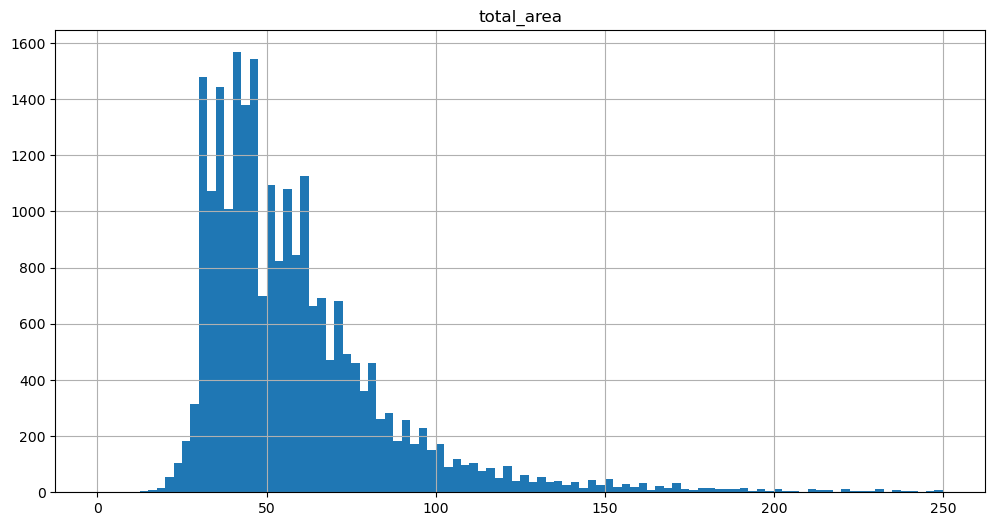

In [41]:
#Изучим гистограму общей площади и данные о значениях.
final_data.hist('total_area',bins=100,figsize=(12,6),range=(0,250));
display(final_data['total_area'].describe())

По гистограмме видно, что большая часть квартир находится в диапазоне от 30 до 70 м2, количество квартир от 100 до 200 м2 стремительно уменьшается, а квартиры больше 200м2 являются единичными случаями. Во время предобработки данных мы уже проверяли такие квартиры, и пришли к выводу, что это не аномалии, а скорее всего элитное жилье.
Медианное значение площади - 52м2, а среднее 60,3м2, учтем, что на среднее значение влияют элитные квартиры больше 200м2.


count    23543.000000
mean        34.498151
std         21.900917
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

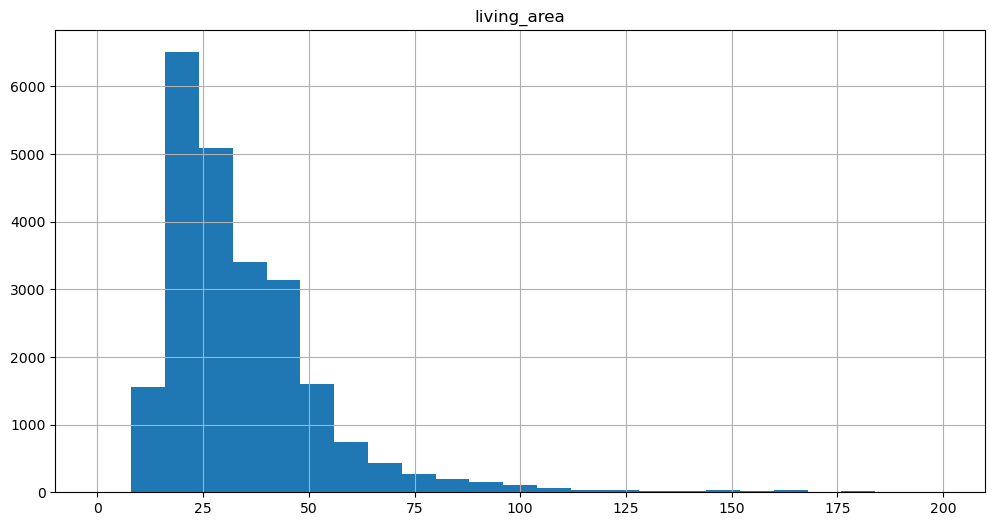

In [42]:
#Изучим гистограмму жилой площади и данные о значениях.
#При построение гистограммы, для более информативной визуализации, пренебрежём квартирами с площадью больше 200м2

final_data.hist('living_area',bins=25,figsize=(12,6), range=(0,200));
display(final_data['living_area'].describe())

По гистограмме видно, что самые распространённые квартиры имею жилую площадь от 17м2 до 33м2, что соответствует информации об общей площади. 75% квартир имеют жилую площадь до 42м2.

count    23134.000000
mean        10.468786
std          5.692426
min          1.300000
25%          7.200000
50%          9.000000
75%         11.600000
max        112.000000
Name: kitchen_area, dtype: float64

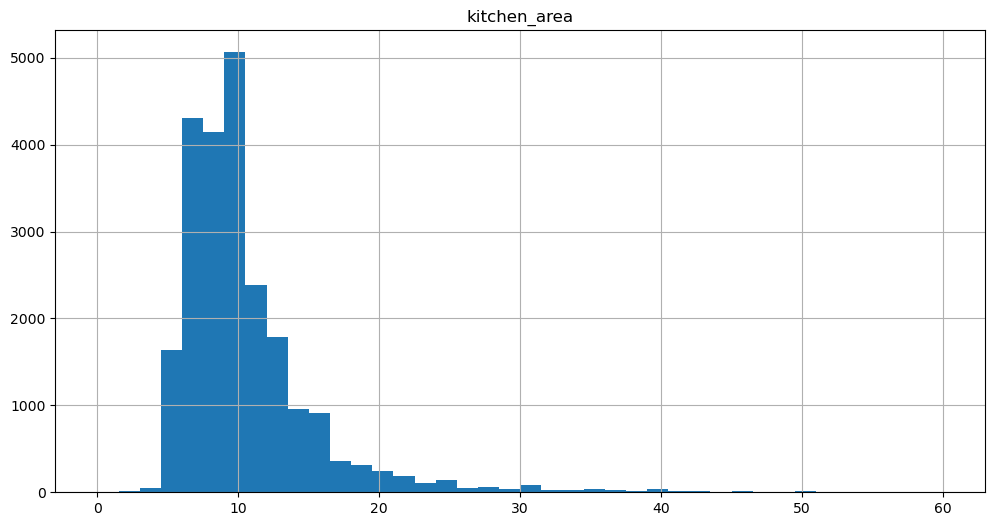

In [43]:
#Изучим гистограмму кухонной площади и данные о значениях.
#При построение гистограммы, для более информативной визуализации пренебрежём квартирами с площадью больше 200м2

final_data.hist('kitchen_area',bins=40,figsize=(12,6), range=(0,60));
display(final_data['kitchen_area'].describe())

По полученным данным можно сделать вывод, что 75% квартир имеют кухню не больше 11.5м2, а половина из всех квартир и вовсе до 9м2, около 2 тысяч квартир имею кухню в районе 14-16м2, после этих показателей количество квартир с большими кухнями идет на спад.

count    23543.000000
mean         6.538255
std         10.907229
min          0.012190
25%          3.400000
50%          4.646000
75%          6.790000
max        763.000000
Name: last_price, dtype: float64

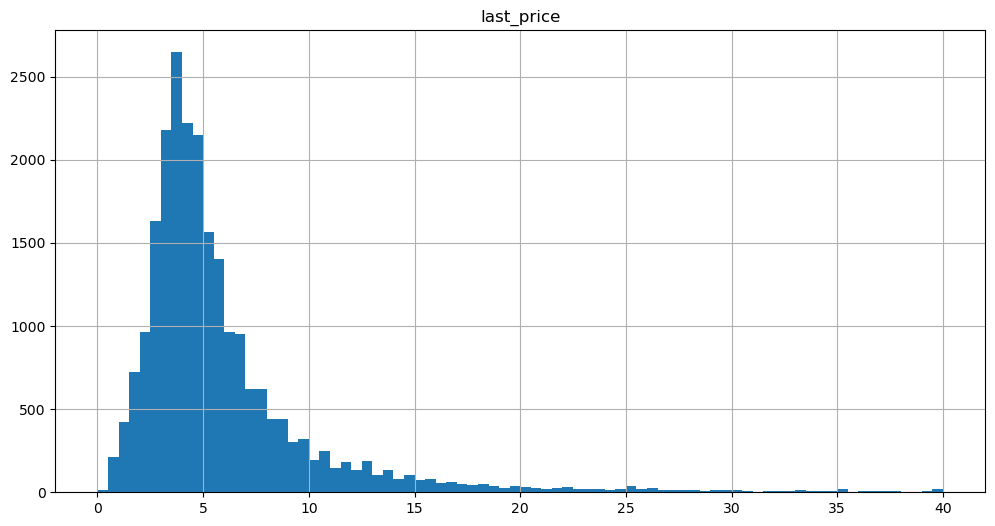

In [44]:
#Изучим гистограмму по цене объекта и данные о значениях.
#При построение гистограммы, для более информативной визуализации пренебрежём квартирами стоимостью более 40 миллионов, 
#так как, их всего пару десятков.

final_data.hist('last_price',bins=80,figsize=(12,6), range=(0,40));
display(final_data['last_price'].describe())

По гистограмме видно, что подавляющая часть квартир находится в диапазоне до 10 миллионов рублей, 75% квартир и вовсе до 7 миллионов. Медиана цены равна 4,6 миллиона. Вероятно, когда будем анализировать цены в самых популярных областях, где большая часть непосредственно сам Санкт-Петербург, медиана и средняя цена будут совершенно другими

count    23543.000000
mean         2.061972
std          1.091214
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

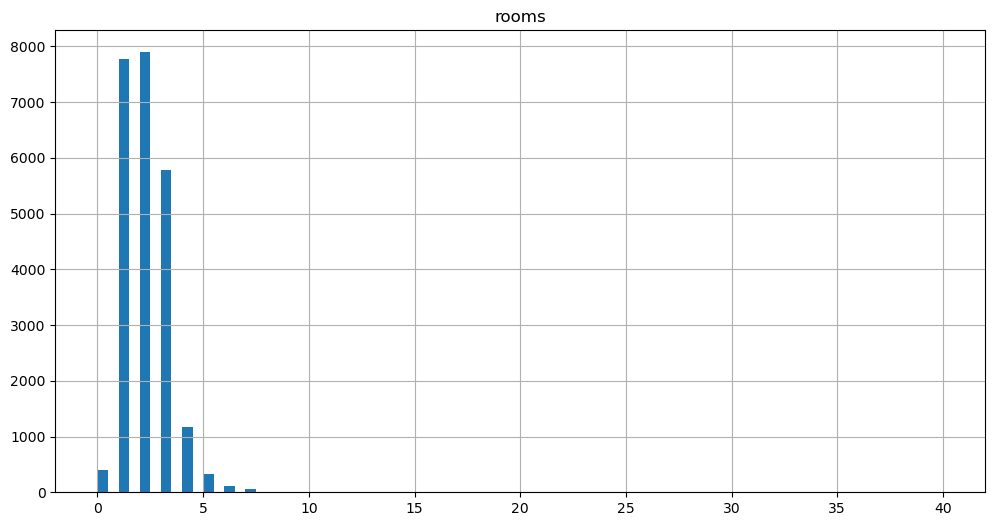

In [45]:
#Изучим гистограмму по количеству комнат и данные о значениях.
final_data.hist('rooms',bins=80,figsize=(12,6), range=(0,40));
display(final_data['rooms'].describe())

Из гистограммы следует, что самые распространенные квартиры это "однушки" и 2х комнатные квартиры, также на рынке было продано около 5800 3х комнатных квартир. Отметим, что 4х комнатных квартир сильно меньше, всего порядка 1200, а более больших квартир совсем не существенное количество.

count    23543.000000
mean         2.707411
std          0.235612
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          6.000000
Name: ceiling_height, dtype: float64

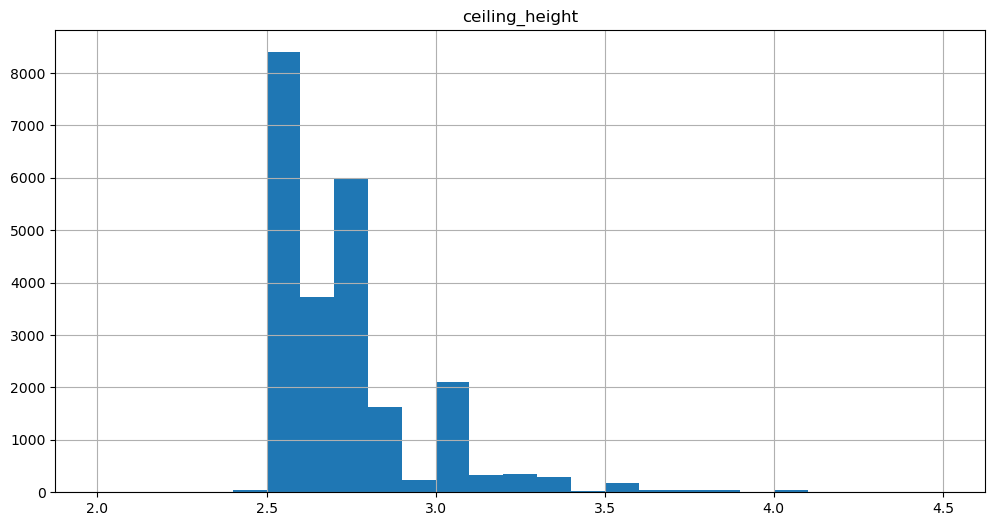

In [46]:
#Изучим гистограмму по высоте потолков и данные о значениях.

final_data.hist('ceiling_height',bins=25,figsize=(12,6), range=(2,4.5));
display(final_data['ceiling_height'].describe())

По полученной информации можно сделать следующее наблюдения. 75% квартир имеют потолки от 2.5м до 2.7 метра, дальше идет два пика с высотой потолка от 2.7 до 2.8 и 3.0 до 3.1 метра. Можем предположить, что большая часть квартир так или иначе относится к старому жилому фонду или квартира 2000 годов застройки, так как это вполне соответствует стандарту тех лет. В последнее время популярной застройкой стали квартиры комфорт класса и выше, в стандартах которых потолки как раз находятся в диапазоне от 2.7 до 3.3 метра.

count    23543.000000
mean         5.875292
std          4.866495
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

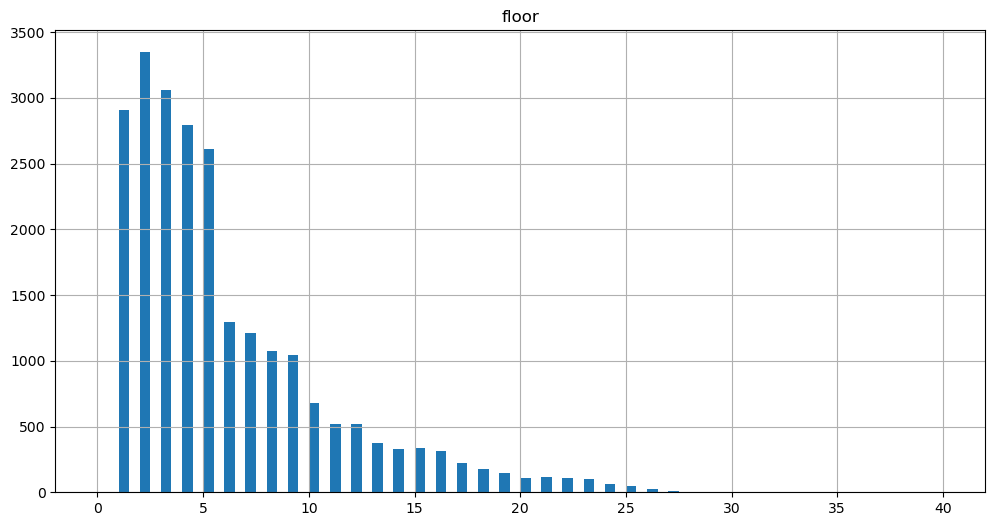

In [47]:
#Изучим гистограму по этажам и данные о значениях.
final_data.hist('floor',bins=80,figsize=(12,6), range=(0,40));
display(final_data['floor'].describe())

По гистограмме видно, что самые распространенные квартиры находятся на 1-5 этаже (около 63% от общей массы), и далее видим резкое снижение количества квартир с ростом этажности. В целом 75% квартир имеют этажность от 1 до 8 этажа.

count      23543
unique         3
top       Другой
freq       17309
Name: floor_type, dtype: object

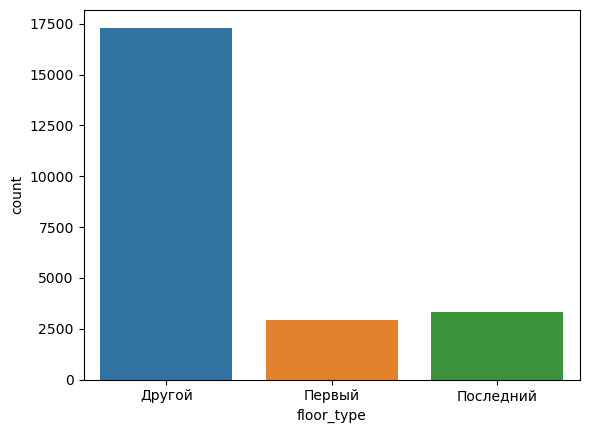

In [48]:
#Изучим типы этажей

#final_data.plot(x='floor_type', kind='hist', gridsize=20, sharex=False)
sns.countplot(x='floor_type', data=final_data)
display(final_data['floor_type'].describe(include='all'))

По графику видно, что соотношение первых и последних этажей одинаково, и логично, что большая часть квартир имеют категорию этажа "Другой"

count    23543.000000
mean        10.672472
std          6.592498
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

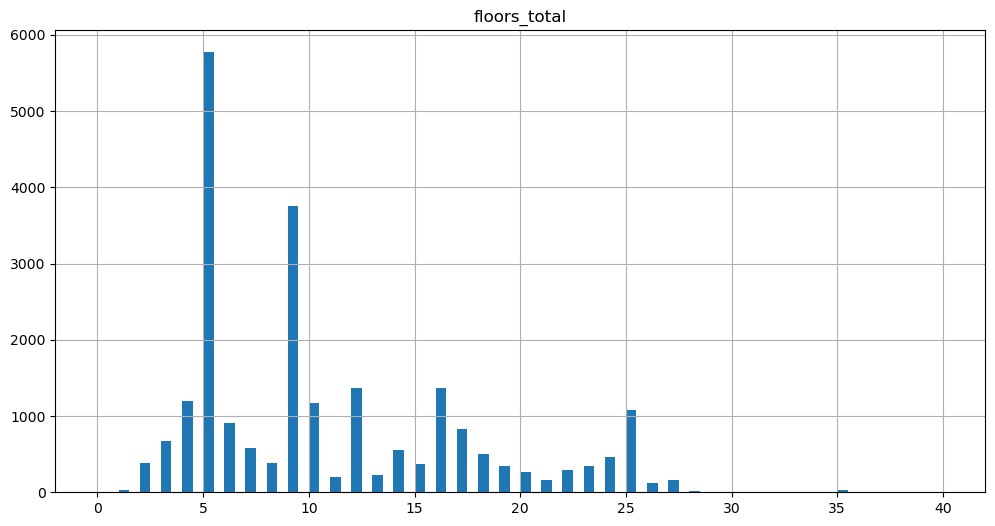

In [49]:
#Изучим гистограмму по этажности домов и данные о значениях.
final_data.hist('floors_total',bins=80,figsize=(12,6), range=(0,40));
display(final_data['floors_total'].describe())

Эта гистограмма подтверждает наши данные из столбца "floor", самые распространенные дома это 5 и 9 этажные дома. На застройку до 9 этажей приходится более половины всех домов.

count    18047.000000
mean     14193.309359
std       8615.290902
min        181.000000
25%       9238.000000
50%      13098.000000
75%      16285.000000
max      65968.000000
Name: citycenters_nearest, dtype: float64

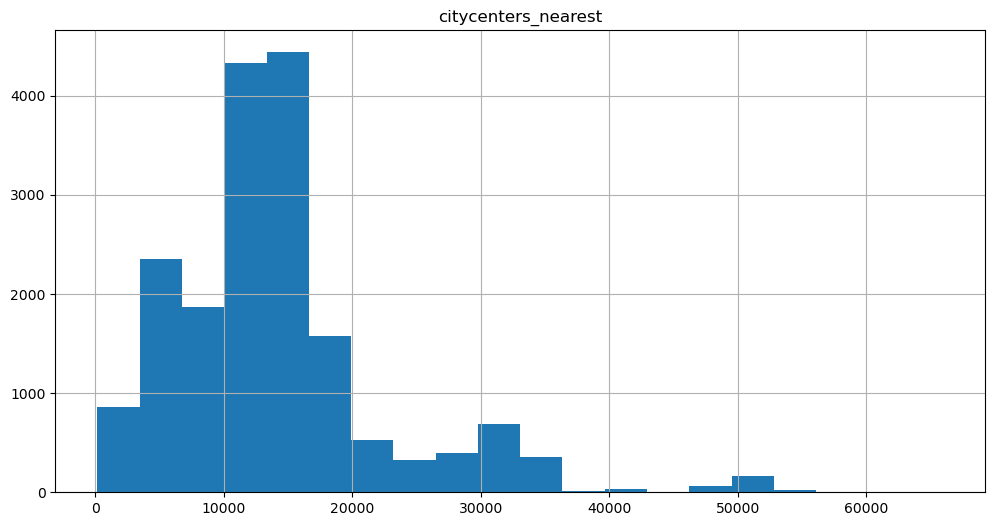

In [50]:
#Изучим гистограмму по удалению от центра города и данные о значениях.
final_data.hist('citycenters_nearest',bins=20,figsize=(12,6));
display(final_data['citycenters_nearest'].describe())

По гистограме мы можем увидеть два пика: Первый в диапазоне 10000 метров до 17000 метров, в этом диапазоне распологается 50% квартир (от 25 процентиля до 75 процентиля). Второй пик находится в диапазоне 35000 метров, проверим эти значения на аномалии.

In [51]:
display(final_data.loc[final_data['citycenters_nearest'] > 35000, 'locality_name'].value_counts())

Ломоносов       132
Кронштадт        95
Сестрорецк       86
Петергоф         53
Лен. Область     40
Красное Село      8
Павловск          4
Колпино           4
Пушкин            2
Name: locality_name, dtype: int64

Подавляющая часть квартир относятся к группе Лен. Область, которую мы формировали из поселений с количеством объявлений 40 и меньше, и так как там отсутствовали картографические значения, заполнили их медианой. При необходимости, можем вернуть значения на NaN, тогда они не будут учитываться и пик исчезнет.

count    18024.000000
mean     28797.559254
std      12633.422599
min          0.000000
25%      18563.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

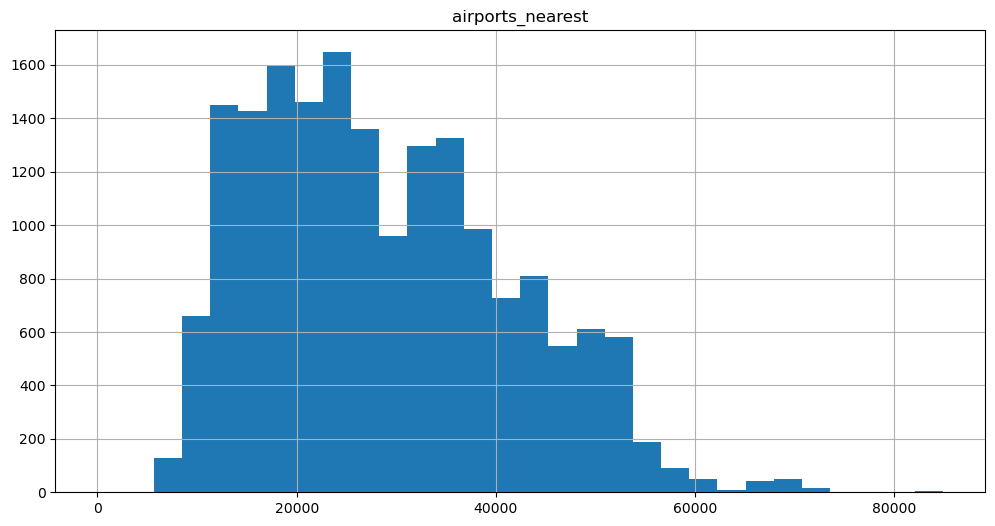

In [52]:
#Изучим гистограмму по близости к аэропорту и данные о значениях.
final_data.hist('airports_nearest',bins=30,figsize=(12,6));
display(final_data['airports_nearest'].describe())

In [53]:
final_data['airports_nearest'].isna().sum()

5519

По этой гистограмме мы видим, что основная доля квартир находится в диапазоне от 17 до 40км от аэропорта (более 80% всех квартир), причем больше всего квартир в диапазоне 18-24км от аэропорта. Также обратим внимание, что в этой колонке целых 5.5 тысячи пропусков. Без картографических данных, к сожалению, с пропусками ничего не сделать.

count    8022.000000
mean      490.520942
std       341.615384
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

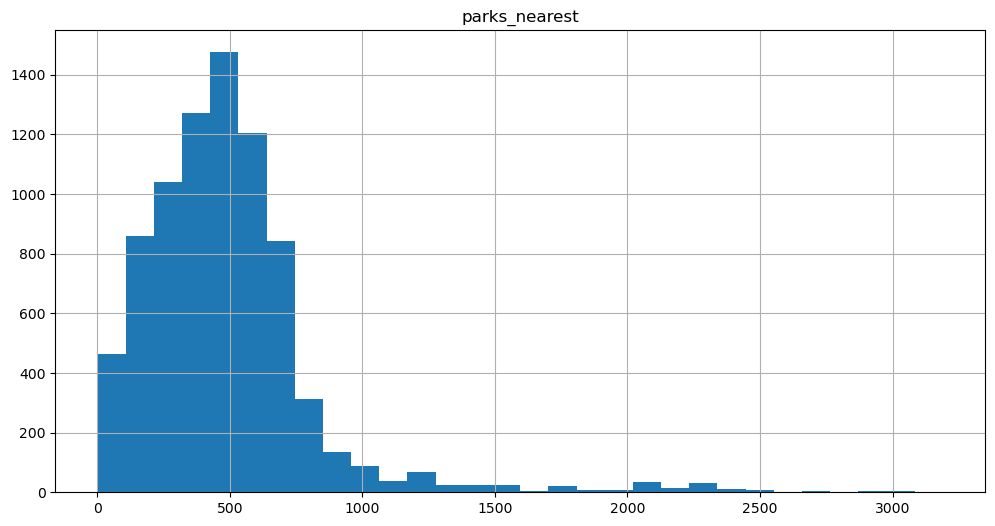

In [54]:
#Изучим гистограмму по удалению от центра города и данные о значениях.
final_data.hist('parks_nearest',bins=30,figsize=(12,6));
display(final_data['parks_nearest'].describe())

In [55]:
final_data['parks_nearest'].isna().sum()

15521

По имеющимся данным можем сделать вывод, что для квартир, у которых указано наличие парка рядом, расстояние до него в 95% случаев будет не больше 1000 метров. Если учесть то, что в данном столбце 15500 пропусков, и тот факт, что эти параметры заполняются автоматически по данным картографии, мы можем сделать следующий вывод: Есть техническое ограничений, что если на расстояние 3000 метров от квартиры нет парка, ставится значение 0 и расстояние NaN. Стоит обратиться к специалисту, и уточнить информацию, насколько это корректно?

In [56]:
'day_week', 'month','year',

('day_week', 'month', 'year')

count    23543.000000
mean         2.567217
std          1.788581
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_week, dtype: float64

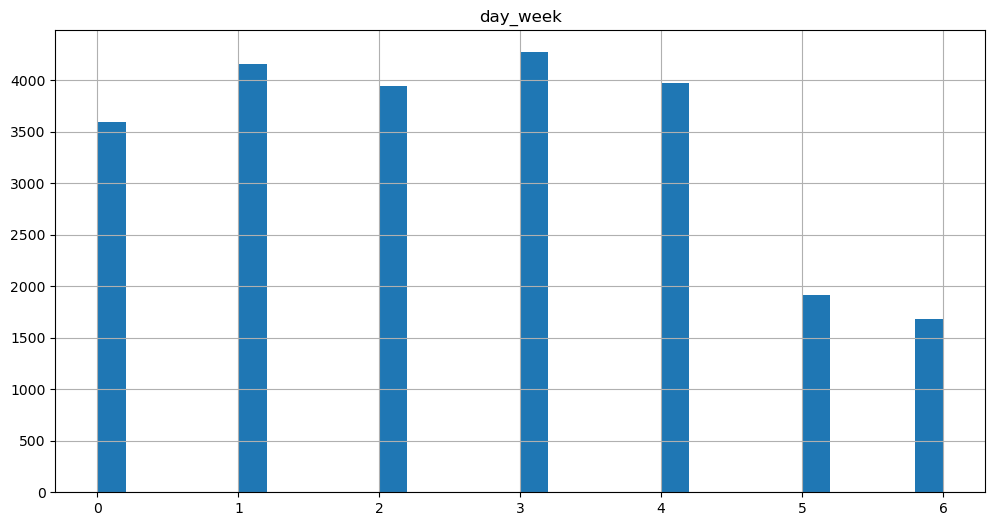

In [57]:
#Изучим гистограмму по удалению от центра города и данные о значениях.
final_data.hist('day_week',bins=30,figsize=(12,6));
display(final_data['day_week'].describe())

По инфографике мы можем утверждать, что в будние дни размещается в два раза больше объявлений, чем на выходных.
Предположительно это можно связать с работой риелторов, и в целом с тем, что люди на выходных предпочитают отдых.


count    23543.000000
mean         6.401606
std          3.493260
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

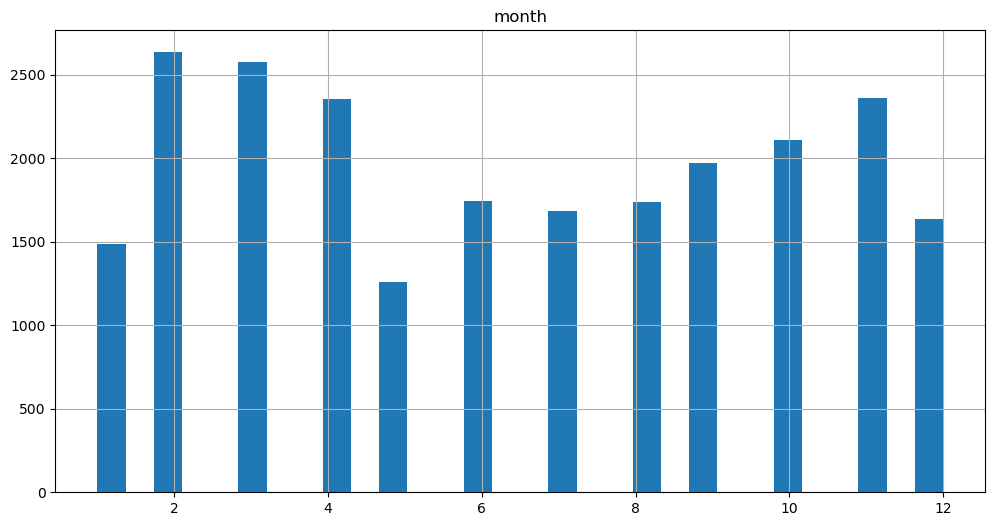

In [58]:
#Изучим гистограмму по удалению от центра города и данные о значениях.
final_data.hist('month',bins=30,figsize=(12,6));
display(final_data['month'].describe())

По данной гистограмме отчетливо виден сезон продаж квартир начиная с конца зимы до середины весны, затем идет сезон отпусков и дач, что вызывает спад на рынке недвижимости, и по окончанию лета активность восстанавливается. Декабрь и Январь имеют провалы, скорее всего это связано с новогодними праздниками и зимними отпусками.

count    23543.000000
mean      2017.371066
std          1.037492
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year, dtype: float64

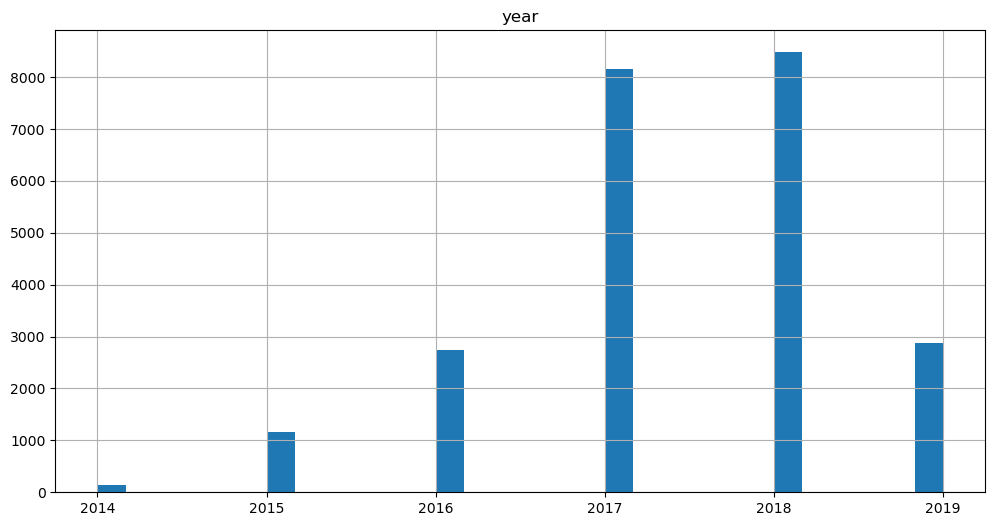

In [59]:
#Изучим гистограмму по удалению от центра города и данные о значениях.
final_data.hist('year',bins=30,figsize=(12,6));
display(final_data['year'].describe())

На это гистограмме видно весь путь развития Яндекс.Недвижимости :р

Как известно, проект запустился в 2010 году, и до 2014 работал в качестве агрегатора обьявлений с сторонних площадок. В конце сентября 2015 года «Недвижимость» отказалась от агрегации объявлений в московском и петербургском регионах, а в 2016 отказалась полностью от этого направления и стала размещать обьявления самостоятельно, в этоже время было выпущено мобильное приложение, и площадка стала разростаться, что мы и видим на гистограмме. Судя по 2019 году могу предположить что дата сет собран весной 2019.

count    20375.000000
mean       180.752589
std        219.771483
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

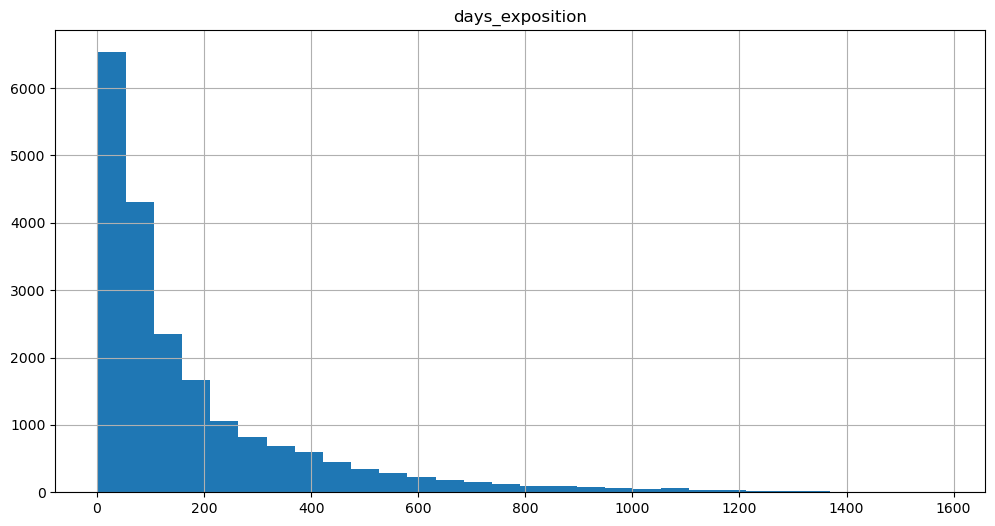

In [60]:
#Изучим как долго продаются квартиры
final_data.hist('days_exposition',bins=30,figsize=(12,6));
display(final_data['days_exposition'].describe())

На гистограмме видно, что 75% квартир продается в течение 231 дня, причем медиана равна 95 дня или 3 месяцам, что достаточно быстро для продажи квартиры. Среднее время продажи равняется 180 дням или половине года, но тут стоит обратить внимание, что на средний показатель сильно влияют объявления которые висят на платформе больше от 8-9 месяцев(долгие продажи) и тем более "мертвые" объявления которые висят больше 2-3 лет. При этом мы не можем позволить себе избавиться от них, например, по принципу "среднее значение + 3 * стандартное отклонение" по причине того, что у нас нет информации, когда обновлялось объявление в последний раз. Вполне вероятно, что просто сложные для продажи объекты.

Может сделать заключение:
* Отчетливо видны быстрые продажи, срок размещения объявлений составляет примерно 95 дней
* Среднее время продажи (около 65-70% квартир уже проданы до этого момента) составляет примерно 200 дней
* Долгие продажи занимают от 8-9 месяцев и больше


In [61]:
print(final_data.corr()[['last_price', 'price']])


                     last_price     price
last_price             1.000000  0.738231
total_area             0.653040  0.303563
rooms                  0.362563  0.054490
ceiling_height         0.297465  0.306997
floors_total          -0.006500  0.149283
living_area            0.567212  0.229627
floor                  0.026889  0.129691
kitchen_area           0.453726  0.370548
balcony               -0.021384  0.007247
airports_nearest      -0.026108 -0.039481
citycenters_nearest   -0.206195 -0.317988
distance_to_center    -0.206279 -0.317585
parks_nearest         -0.016752  0.006621
ponds_nearest         -0.085873 -0.105394
days_exposition        0.081088  0.047702
price                  0.738231  1.000000
day_week               0.001378 -0.007020
month                  0.002767 -0.002016
year                  -0.043175  0.008351


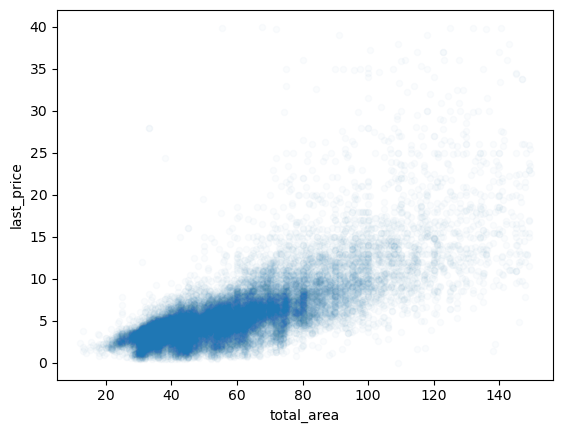

In [62]:
final_data.query('total_area<150 and last_price <40').plot(x='total_area', y='last_price', kind='scatter',alpha=0.02);

По данному графику корреляции можно сделать вывод, что цена квартиры до 75м2 увеличивается не пропорционально её размеру, другими словами, стоимость квадратного метра уменьшается. Если обратимся к значениям корреляции, то подтвердим наш вывод, так как значение равно 0.63. Однако после отметки 75м2 начинается большое рассеивание, скорее всего это связано с тем, что увеличивается количество жилья комфорт и бизнес класса, в таком жилье на стоимость м2 влияет очень много факторов.

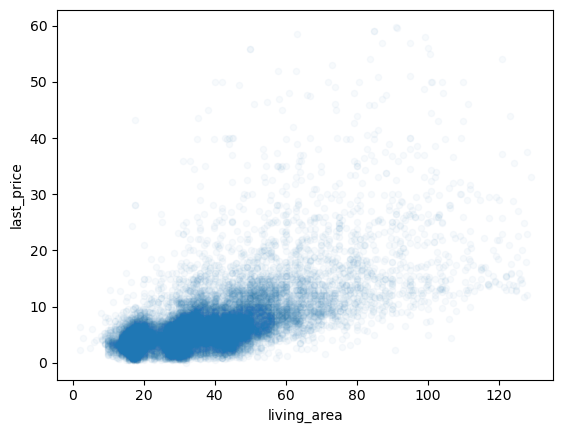

In [63]:
final_data.query('living_area<130 and last_price <60').plot(x='living_area', y='last_price', kind='scatter',alpha=0.03);

Ситуация с зависимостью жилой площади и цены похожа на предыдущий график, однако отметим, что после отметки в 60м2 для жилой площади, график рассеивается сильнее, чем при сравнение цены и общей площади. Коэф.корреляции для этой пары 0.56.

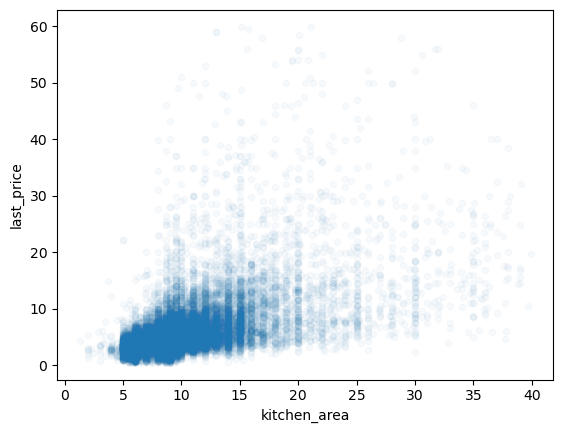

In [64]:
final_data.query('kitchen_area<40 and last_price <60').plot(x='kitchen_area', y='last_price', kind='scatter',alpha=0.03);

Если рассматривать зависимость цены от площади кухни, то тут показатель корреляции еще ниже, чем при сравнение с общей площадью. Однако отметим, что отклонения от общей массы  на графике начинаются с самых маленьких значений площади кухни.

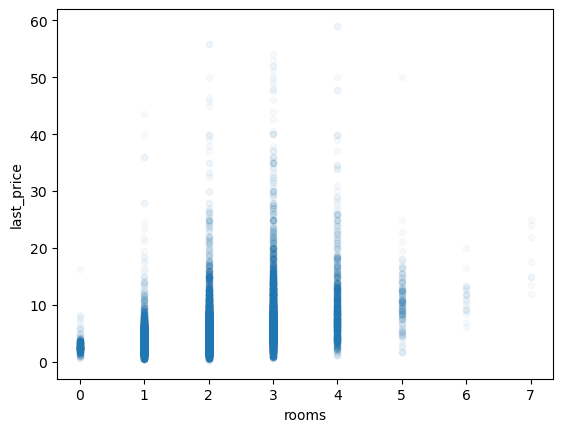

In [65]:
final_data.query('total_area<150 and last_price <60').plot(x='rooms', y='last_price', kind='scatter',alpha=0.03);

Отчетливо видно, что цена начиная от студий (0 комнат) и до 3х комнатных квартир стабильно растет, но начиная с 4х комнатных квартир цены за м2 начинают падать.

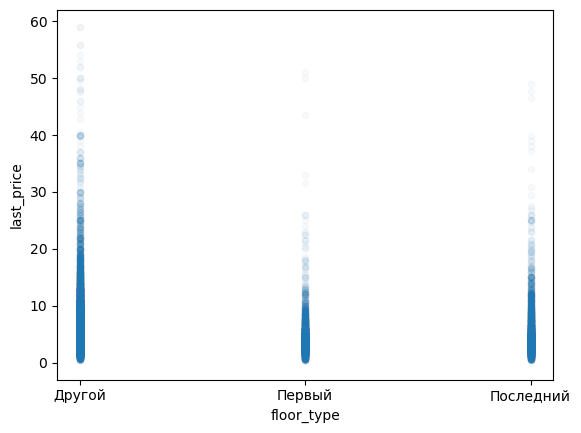

In [66]:
final_data.query('total_area<150 and last_price <60').plot(x='floor_type', y='last_price', kind='scatter',alpha=0.03);

По данному графику может заметить, что квартиры на первом этаже самые дешевые, чуть дороже стоят квартиры на последнем этаже. Сильно по цене отличаются квартиры на других этажах, и имеют самый большой диапазон цен.

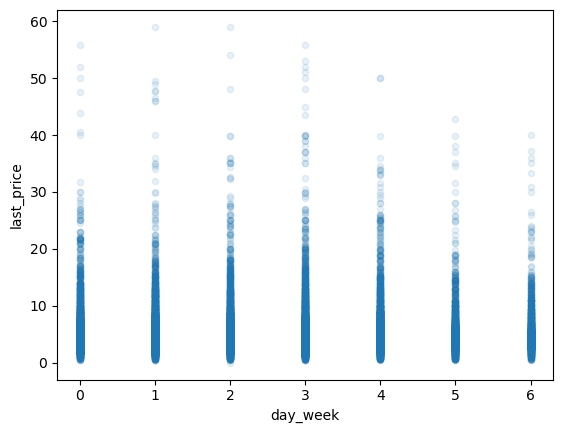

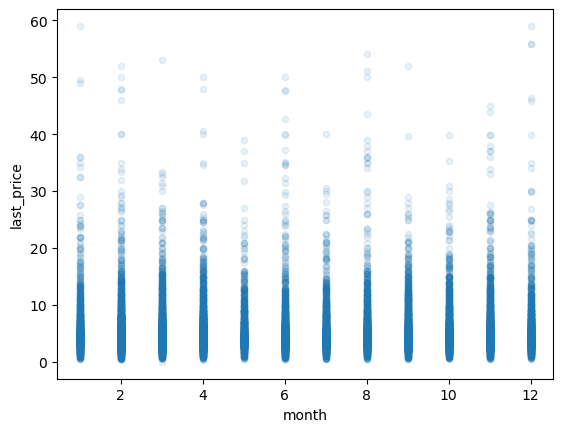

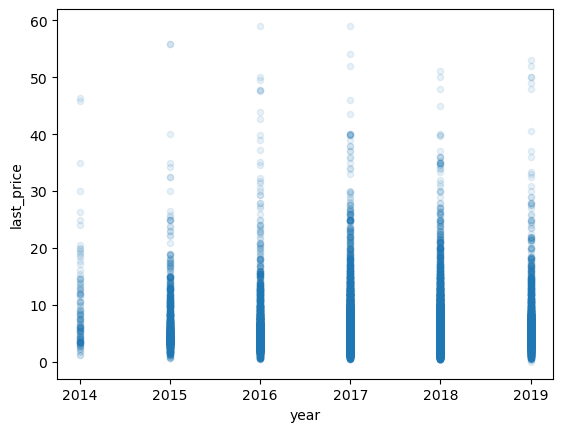

In [67]:
final_data.query('total_area<150 and last_price <60').plot(x='day_week', y='last_price', kind='scatter',alpha=0.1);
final_data.query('total_area<150 and last_price <60').plot(x='month', y='last_price', kind='scatter',alpha=0.1);
final_data.query('total_area<150 and last_price <60').plot(x='year', y='last_price', kind='scatter',alpha=0.1);

Можем заметить некоторые зависимости

Квартиры, выставленные в среду и четверг, имеют более высокую цену, а в субботу и воскресенье более низкую.

Сезонность сказывается и на цене квартир, вместе с активностью в зимне-весенний период, цены тоже отличаются более высокими значениями, напротив, к лету падают, скорее всего, на это влияет спрос.

Средняя цена растет с 2014 до 2017г, который является пиковым, далее к 2018 году идет небольшой спад, и в 2019 цены вернулись на уровень 2016 года, но возможно это связано с тем, что данные собраны за не полный 2019 год.


**Изучение цены по населённым пунктам**

Выделим самые активные населенные пункты на рынке недвижимости, также держим в голове, что ранее мы объездили поселки, поселки городского типа и т.д., которые находились на удаление от Санкт-Петербурга в одну группу (Лен.Область), поэтому мы исследуем не 10 а 11 групп.


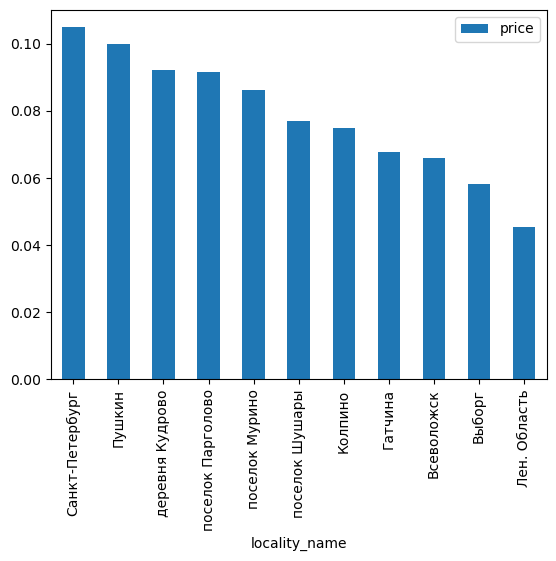

In [68]:
#Для получения необходимого результат создадим сводную таблицу, которая сведет 11 групп с наибольшим количеством объявлений
#и построим столбчатую диаграмму по этой таблице

final_data.query('locality_name in locality_name.value_counts().head(11).index').pivot_table \
                 (index='locality_name', values='price',\
                  aggfunc='median').sort_values(by='price',ascending=False).plot(kind='bar');




Результаты вполне ожидаемы и выглядит правдоподобным. Самое высокая стоимость жилья за м2 в Санкт-Петербурге, немного дешевле Пушкин, дальше идут три густозаселенных новостройками района, Кудрово, Парголово, Мурино. Как и ожидалось, самое дешевое жилье в Лен.Области, в населенных пунктам которые находятся на большом удаление от города.

Произведем расчет стоимости каждого километра до центра города для квартир в Санкт-Петербурге

Заказчик исследования хочет увидеть среднюю стоимость, но для более надежного результат построим диаграмму по двум значения, средняя и медиана.


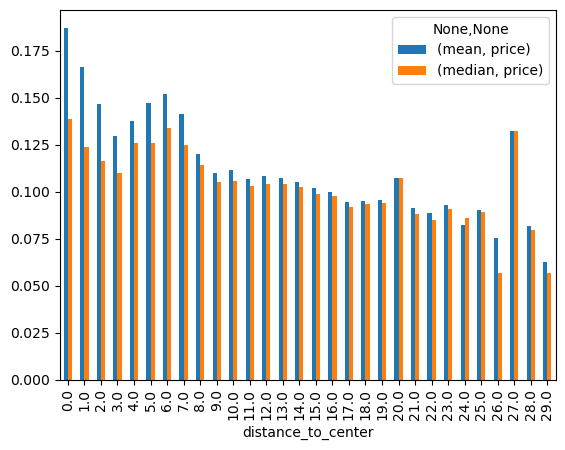

In [69]:
final_data.query('locality_name == "Санкт-Петербург"').pivot_table(index='distance_to_center', \
                                                                 values='price', aggfunc=['mean','median']).plot(kind='bar');

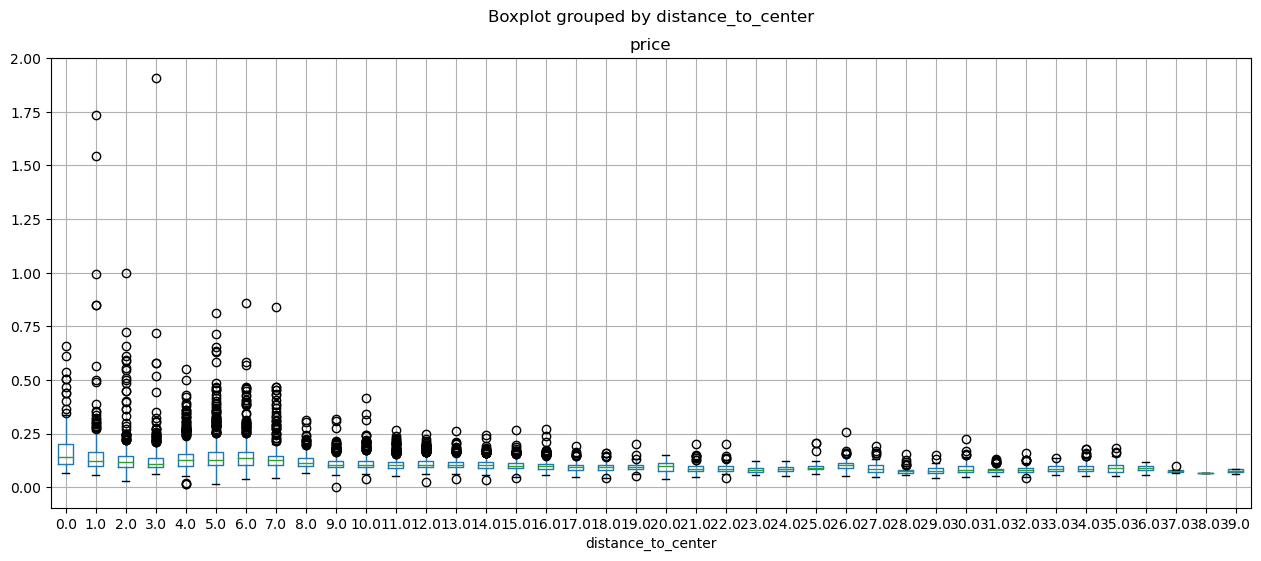

In [70]:
final_data.query('distance_to_center<40').boxplot('price', by='distance_to_center', figsize=(15,6));

Наблюдения после анализа:
* Медиана и среднее ведут себя одинаково, значит, результат можно расценивать как правдоподобный.
* Ожидаемо, самые дорогие квартиры находятся в пределах 7км от центра, причем виден провал по стоимости на расстояние 3км.
* После 7км и до 23км стоимость м2 постепенно снижается, но разница между квартирами в 8км от центра и 23 не велика.



**Дополнительный анализ**


Для квартир из 10 самый активных населенных пунктов (исключая Лен.Область)

Отметим, что мы не будем учитывать категорию "Другие", так как фильтр, который основывался на данных из СНИП не смог однозначно категорировать их, и данные, скорее всего, будут искажены, что для нас не является ценностью

* Проведем исследование стоимости квадратного метра в зависимости от класса жилья
* Проведем исследование полной стоимости жилья в зависимости от класса жилья


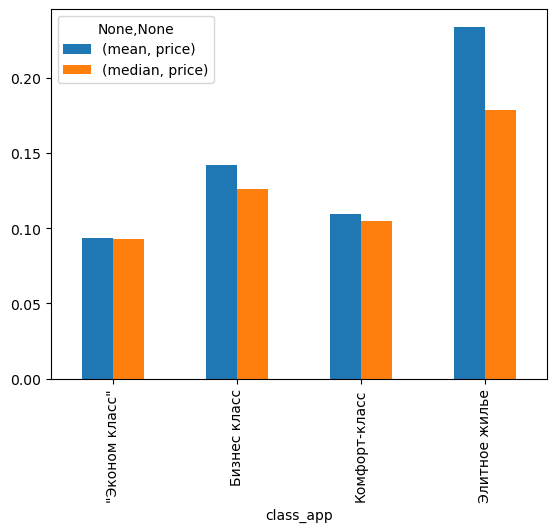

In [71]:
final_data.query('locality_name in locality_name.value_counts().head(11).index and \
               locality_name != "Лен.Область" and class_app != "Другой"' ).pivot_table(index='class_app', \
                                                             values='price', aggfunc=['mean','median']).plot(kind='bar');

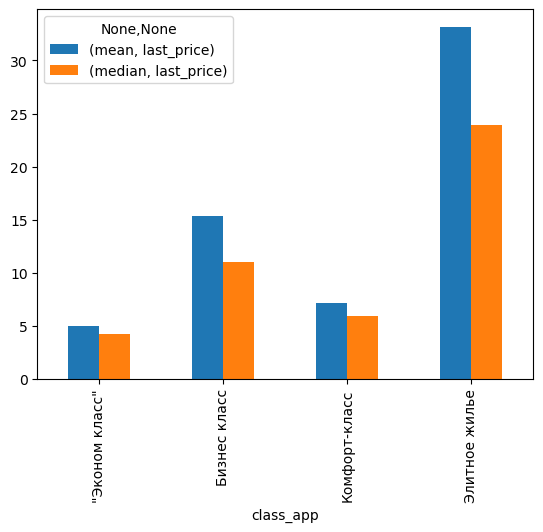

In [72]:
final_data.query('locality_name in locality_name.value_counts().head(11).index and \
               locality_name != "Лен.Область" and class_app != "Другой"' ).pivot_table(index='class_app', \
                                                             values='last_price', aggfunc=['mean','median']).plot(kind='bar');

In [73]:
#final_data.query('locality_name == "Санкт-Петербург" and  distance_to_center == 20.0')

Можем сделать вывод, что жилье эконом класса и комфорт класса не сильно отличается по стоимости м2 и полной стоимости.
Ощутима разница начинается при рассмотрение жилья бизнес класса, м2 стоит дороже примерно на 30% и 15-20% чем у эконом класса и комфорт класса соответственно. Ожидаемо, элитное жилье выделяется на фоне всех остальных классов, и имеет полную стоимость разительно отличающеюся от эконом и комфорт класса, и более чем в два раза дороже чем бизнес класс. м2 для такого жилья также дороже в 2 раза чем у эконом и комфорт класса и на 35-40% дороже чем у бизнес класса.


Также не забудем провести анализ взаимосвязи стоимости квартиры и высота потолков

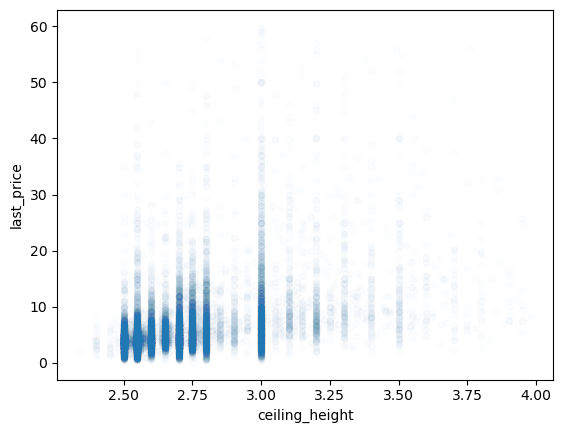

In [74]:
final_data.query('2.3<ceiling_height<4 and last_price <60').plot(x='ceiling_height', y='last_price', kind='scatter',alpha=0.01);

На графике видно разделение на 3 группы, самые дешевые квартиры с потолками 2.5-2.65, дороже стоят квартиры с потолками от 2.7 до 2.8, самые дорогие квартиры с потолками окло 3х метров.

### Общий вывод

Проведя детальную предобработку данных, и полный исследовательский анализ, удалось выявить очевидные и не очевидные факторы, которые влияют на стоимость квартиры:

* Можем утверждать, что есть незначительное соответствие цены квартиры и общей площади квартиры, чем больше квартира, тем меньше растет её цена, другими словами стоимость м2 падает с увеличением площади квартиры. Большая часть квартир находится в диапазоне от 30 до 70 м2. Почти такая же зависимость проявляется при сравнение цены и жилой площади. В меньшей степени на стоимость квартиры влияет площадь кухни.


*  Цена квартир увеличивается от 1 до 3 комнат, но начиная от 4 комнат - стоимость квартиры возрастает меньше и цена за м2 снижается.


* Квартиры на первом и последнем этаже стоят дешевле, чем на других этажах, при это стоимость последнего этажа немного выше, чем первого.


* Дороже всего продаются квартиры выставленные на продажу в зимне-весенний сезон, а в летний период квартиры выставляются по самым низким ценам. Также есть зависимость от дней недели, когда выставлено объявление. На буднях по среди недели выставляются квартиры дороже, на выходных стоимость выставленных квартир уменьшается.


* Средняя цена квартиры растет с 2014 до 2017г, который является пиковым, далее к 2018 году идет небольшой спад, и в 2019 цены вернулись на уровень 2016 года.


* Для квартир в Санкт-Петербурге расстояние до центра города сильно влияет на цену в радиусе 7 км, меньшее влияние, но все же наличие зависимости присутствует в диапазоне от 8 до 23 км, далее цены почти не меняются


* Цены на квартиры напрямую зависят от населенного пункта. Самое высокая стоимость жилья за м2 в Санкт-Петербурге, немного дешевле Пушкин, дальше идут три густозаселенных новостройками района, Кудрово, Парголово, Мурино. Квартиры в Лен. Области самые дешевые


* Класс жилья сильно влияет на стоимость квартиры. Если разница между эконом и комфорт классом не сильно проявляется, то разница между ними и бизнес классом и комфорт классом очень большая.


* 75% квартир продается в течение 231 дня, медианой является показатель 95 дней, что достаточно быстро для продажи квартиры.

* Самые дешевые квартиры с потолками 2.5-2.65, дороже стоят квартиры с потолками от 2.7 до 2.8, самые дорогие квартиры с потолками около 3х метров.


#### Общий итог и рекомендации:

**Рекомендации**

Полученные данные о связи различных факторов с ценой квартиры рекомендуется использовать при построении модели анализа ориентировочной стоимости жилья, которую можно показывать в качестве рекомендации пользователю, когда тот заполняет объявление.

**Необходимо**

Сообщить коллегам, занимающимся выгрузкой о наличие дубликатов и коллегам занимающимся разработкой формы для заполнения объявления о наличие дубликатов в столбце 'locality_name'. Также сообщить коллегам занимающимся сбором данных о наличие проблем с обработкой картографических данных и приложить информацию о пропусках в значениях, связанных с ними.

Прописать в задаче на поставку данных формат данных (булевы типы только True и False), также оформить запрос на дополнительную информацию. Адрес дома, год постройки дома, первичная цена на момент публикации объявления,



